# KNN 

In [6]:
from sklearn.datasets import load_wine
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

wine = load_wine()
print(wine.feature_names)
print(wine.target_names)
wine.keys()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [10]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns = ["wine_class"])], axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [13]:
df["wine_class"].value_counts()

1    71
0    59
2    48
Name: wine_class, dtype: int64

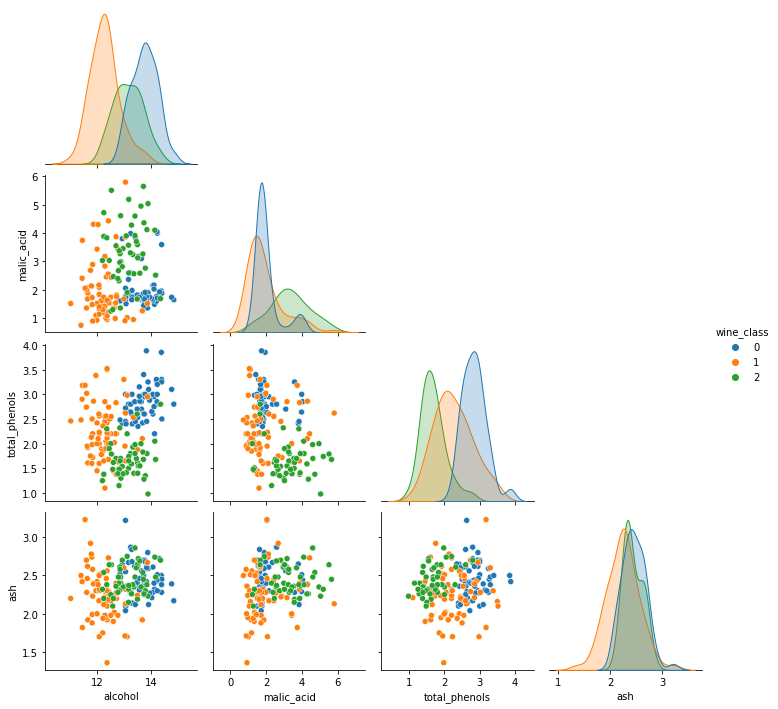

In [16]:
sns.pairplot(
    data=df[["alcohol", "malic_acid", "total_phenols", "ash", "wine_class"]],
    corner=True,
    hue="wine_class",
    palette="tab10",
)

<AxesSubplot:>

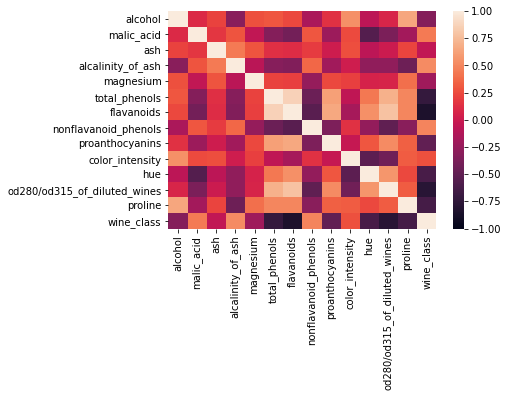

In [18]:
sns.heatmap(df.corr(), annot=False, vmin = -1, vmax = 1)

## KNN classification

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 

X, y = df.drop("wine_class", axis = 1), df["wine_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.min(), scaled_X_train.max())
print(scaled_X_test.min(), scaled_X_test.max())

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(scaled_X_train, y_train)

y_pred = model_KNN.predict(scaled_X_test)
y_pred[:10], np.array(y_test[:10])


0.0 1.0
-0.05077262693156731 1.2428256070640176


(array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2]), array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2]))

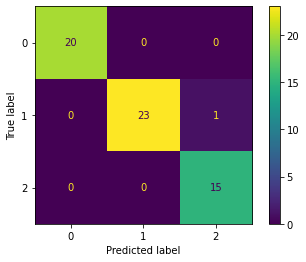

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
